# **Coursera Capstone Project: Week 4**

#### **Author: Poulomi Saha**

## 1. Introduction

New York City (NYC), is the most populous city in the United States. With an estimated 2019 population of 8,336,817, New York City is also the most densely populated major city in the United States. New York City is composed of five boroughs, each of which is a county of the State of New York.The city and its metropolitan area constitute the premier gateway for legal immigration to the United States,which has a larger immigrant population than any other country, with 47 million immigrants as of 2015.
A published article claims that there are about 710,000 Indians residing in NYC, which is about 9% of the total NYC population.
Among many other things, Indians are known for their love towards Indian flavorsome, spicy food.
In this final project, the best locations for eating & ordering out Indian as well as opening an Indian restaurant is explored throughout NYC.
Hence this will not only benefit the Indians and the diverse cultured people who are fond of Indian food, but also can be a guide to the newcomers into the NYC.

## Discussion Module

- How many Indian restaurants are there in NYC and how are they distributed along different neighborhoods/boroughs?
- Which are the best locations to find Indian food joints in NYC?
- In which areas do the newcomer Indians decide to reside?
- In which neighborhood should a potential restaurant owner invest to have best chance of success?

## 2. Data/Sample

In order to answer above questions, the following data is needed:
- Geospatial information of NYC, including names of neighborhoods, boroughs as well as their geodata( latitude, longitude).
- Details such as name,menu,ratings of Indian restaurants in NYC.

Above informatio can either be gathered from internet and/or requested from Foresquare API using python and geopy data.

## 3. Methodology

1. NYC geospatial data will be collected from https://cocl.us/new_york_dataset.
2. Data of Indian restaurants will be requested by using Foresquare API and Geopy map.
3. Collected data will be processed and exploratory analysis will be performed on the data.
4. Cleaned data will be visualised using different python libraries.

## 4. References

1.  https://en.wikipedia.org/wiki/New_York_City
2. https://www1.nyc.gov/assets/immigrants/downloads/pdf/moia_annual_report_2018_final.pdf
3. https://www.novacredit.com/resources/desis-in-new-york-a-guide-for-indian-newcomers-in-new-york-city/#:~:text=New%20York%20City%20houses%20one,Indian%20residents%20as%20of%202017.

## 5. Libraries used to drive through the project

1.	Pandas: To create and manipulate data frames.
2.	Folium: Python visualization library would be used to visualize the neighborhood cluster distribution of using an interactive leaflet map.
3.	Scikit Learn: To import k-means clustering.
4.	JSON: Library to handle JSON files.
5.	XML: To separate data from presentation and XML stores data in plain text format.
6.	Geopy/Geocoder: To retrieve Location Data.
7.	Beautiful Soup and Requests: To scrap and library to handle HTTP requests.
8.	Matplotlib: To Python Plotting Module.

## 6. Conclusion

In this study, I analyzed the population count that is Indian by origin and their preferred location of residence,so as to gauge the location of indian restaurants in the neighborhood. Also the new comers into the country were taken in account so that they could be given a vivid idea of where to get their take outs or dining options having Indian meal as their option. The Indian residential areas also helped in finalizing the neighborhood where a new Indian food joint venture would successfully work.

<br>

## **Coursera Capstone Project: Week 5**

#### Import Libraries

In [1]:
!pip install folium

In [2]:
!pip install beautifulsoup4

     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01


In [21]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from bs4 import BeautifulSoup
print("Libraries imported.")

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Foursquare Credentials

In [4]:
CLIENT_ID = '3SWS5GQVTD3CAU541RLQMSSJGOQM5TE5MAICXQN5A5Z2ASPT' 
CLIENT_SECRET = 'R5BIIXNDUAHDIALW2GNZYBKGVHOPUCBHB1SISIORFPDEDBAC'
VERSION = '20180604' 
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3SWS5GQVTD3CAU541RLQMSSJGOQM5TE5MAICXQN5A5Z2ASPT
CLIENT_SECRET:R5BIIXNDUAHDIALW2GNZYBKGVHOPUCBHB1SISIORFPDEDBAC


### Collect geospatial Data of NYC

##### Collecting information about Boroughs, Neighborhoods, Latitude, Langitude from the url, and collects in a dataframe

In [5]:
def collecting_new_york_data():
    
    url='https://cocl.us/new_york_dataset'
    
    resp=requests.get(url).json()
    
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data


ny_data = collecting_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
ny_data.shape

(306, 4)

In [7]:
ny_data.groupby('Borough').count()

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


### Collect Data About Indian Restaurants

##### Collecting Names & IDs of indian restaurants from the dataframe

In [8]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name


<br>

### Collecting names and IDs of Indian restaraunts

In [11]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name


In [12]:
def get_venues(lat,lng):
    
    radius=500
    LIMIT=100
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [13]:
count=1
for row in ny_data.values.tolist():
   Borough, Neighborhood, Latitude, Longitude=row
   venues = get_venues(Latitude,Longitude)
   indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
   print('(',count,'/',len(ny_data),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
   print(row)
   for resturant_detail in indian_restaurants.values.tolist():
       id, name , category=resturant_detail
       indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                               'Neighborhood': Neighborhood, 
                                               'ID': id,
                                               'Name' : name
                                              }, ignore_index=True)
   count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
['Bronx', '

In [14]:
# Saving restraunt data into a CSV file because of the limited number of calls on Foursquare

indian_rest_ny.to_csv(r'C:\Users\Dell\Documents\Courses\Applied Data Science Capstone\Week 4 & 5\indian_rest_ny_tocsv1.csv')

##### Reading the CSV file

In [16]:
indian_ny = pd.read_csv(r'C:\Users\Dell\Documents\Courses\Applied Data Science Capstone\Week 4 & 5\indian_rest_ny_tocsv1.csv')
indian_ny = indian_ny.drop(columns=['Unnamed: 0'])
indian_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights


In [17]:
indian_ny.tail()

,Borough,Neighborhood,ID,Name
58,Bronx,Concourse Village,551b7f75498e86c00a0ed2e1,Hungry Bird
59,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux
60,Manhattan,Turtle Bay,4a5b660df964a52015bb1fe3,Amma
61,Manhattan,Flatiron,52a1fa08498ede15b1530912,Deep Indian Kitchen
62,Brooklyn,Fulton Ferry,506a2625498e3c434686abbc,Asya Indian Restaurant


In [18]:
indian_ny.shape

(63, 4)

In [19]:
indian_ny.groupby('Borough')['ID'].count()

Borough
Bronx             3
Brooklyn         15
Manhattan        26
Queens           18
Staten Island     1
Name: ID, dtype: int64

## Indian restaraunts per Borough

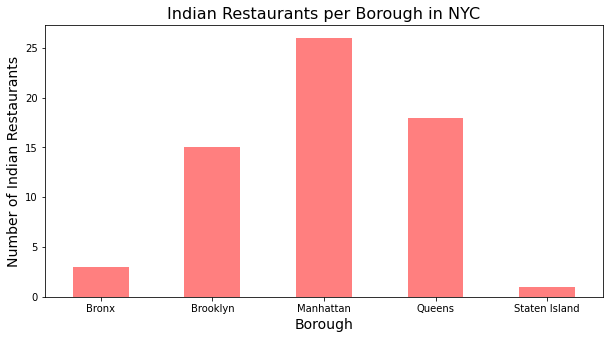

In [23]:
indian_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color='red', alpha = 0.5)
plt.title('Indian Restaurants per Borough in NYC', fontsize = 16)
plt.xlabel('Borough', fontsize = 14)
plt.ylabel('Number of Indian Restaurants', fontsize=14)
plt.xticks(rotation = 'horizontal')
plt.show()

## Indian restaraunts per Neighborhood

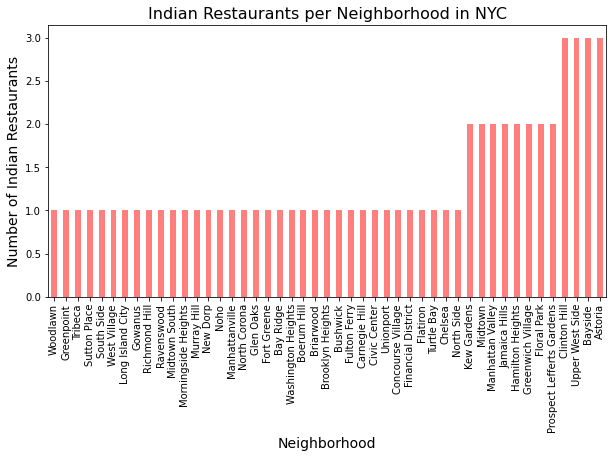

In [24]:
indian_ny.groupby('Neighborhood')['ID'].count().sort_values().plot.bar(figsize=(10,5), color='red', alpha = 0.5)
plt.title('Indian Restaurants per Neighborhood in NYC', fontsize = 16)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('Number of Indian Restaurants', fontsize=14)
plt.xticks(rotation = '90')
plt.show()

### **Collecting details of Indian restaraunts**

Following two functions collect the venue details and put them in a dataframe, the details being:
1. ID
2. Names
3. Likes
4. Ratings
5. Tips

In [25]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [26]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5ffebd3db16446703b286717'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}, {'label': 'entrance', 'lat': 40.897709, 'lng': -73.86707}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 

KeyError: 'venue'

In [27]:
# Saving restraunt data into a CSV file because of the limited number of calls on Foursquare

indian_rest_stats_ny.to_csv(r'C:\Users\Dell\Documents\Courses\Applied Data Science Capstone\Week 4 & 5\indian_rest_stats_ny.csv')

##### Reading the CSV file

In [28]:
indian_stats_ny = pd.read_csv(r'C:\Users\Dell\Documents\Courses\Applied Data Science Capstone\Week 4 & 5\indian_rest_stats_ny.csv')
indian_stats_ny = indian_stats_ny.drop(columns=['Unnamed: 0'])
indian_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.7,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14,7.1,4
3,Brooklyn,Greenpoint,0,0,0,0.0,0
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12,5.6,5


In [29]:
indian_stats_ny.shape

(50, 7)

Getting information about each feature and correcting their datatype

In [30]:
indian_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     int64  
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [31]:
indian_stats_ny['Likes'] = indian_stats_ny['Likes'].astype('float64')
indian_stats_ny['Tips'] = indian_stats_ny['Tips'].astype('float64')
indian_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


### Exploratory Data Analysis

In [32]:
indian_stats_ny.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.000000
mean,66.480000,6.572000,24.560000
std,146.017645,2.802261,46.010717
min,0.000000,0.000000,0.000000
25%,7.000000,6.325000,3.000000
50%,21.500000,7.800000,9.500000
75%,70.250000,8.200000,23.750000
max,830.000000,9.000000,255.000000


Indian resturant in NYC with maximum Likes

In [33]:
indian_stats_ny.iloc[indian_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                830
Rating                               8.7
Tips                                 255
Name: 23, dtype: object

Indian resturant in NYC with maximum Ratings

In [34]:
indian_stats_ny.iloc[indian_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                601
Rating                                 9
Tips                                 150
Name: 29, dtype: object

Indian resturant in NYC with maximum Tips/Comments

In [35]:
indian_stats_ny.iloc[indian_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                830
Rating                               8.7
Tips                                 255
Name: 23, dtype: object

### Top Neighborhoods with the highest average ratings of Indian restaurants

In [36]:
ny_neighborhood_stats=indian_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(20)

,Neighborhood,Average Rating
29,Tribeca,9.000000
33,West Village,8.600000
21,Midtown,8.450000
0,Astoria,8.366667
31,Upper West Side,8.233333
28,South Side,8.200000
24,North Side,8.200000
11,Fort Greene,8.200000
3,Boerum Hill,8.100000
19,Manhattan Valley,7.900000


### Top Boroughs with the highest average ratings of Indian restaurants

In [37]:
ny_borough_stats=indian_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,7.000000
1,Brooklyn,6.957143
2,Manhattan,6.742105
3,Queens,5.940000


### Average rating of Indian restaurants per borough

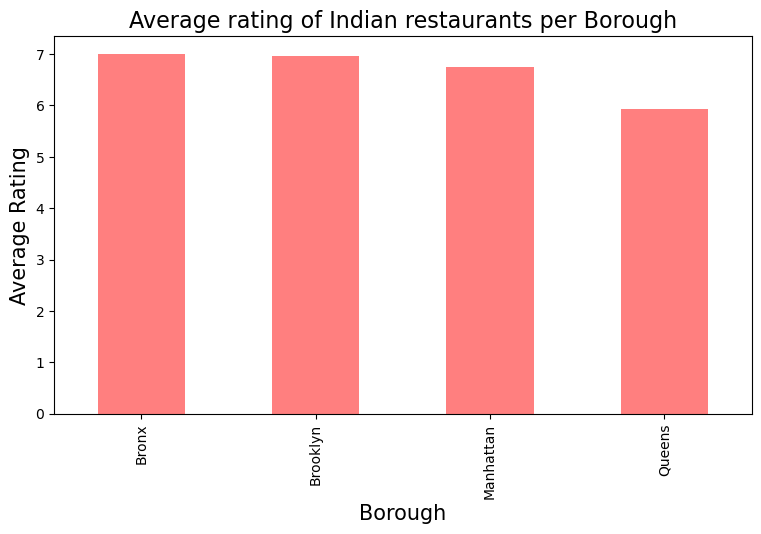

In [38]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian restaurants per Borough', fontsize = 16)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
indian_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='red', alpha=0.5)
plt.show()

### Average rating of Indian restaurants per Neighborhood

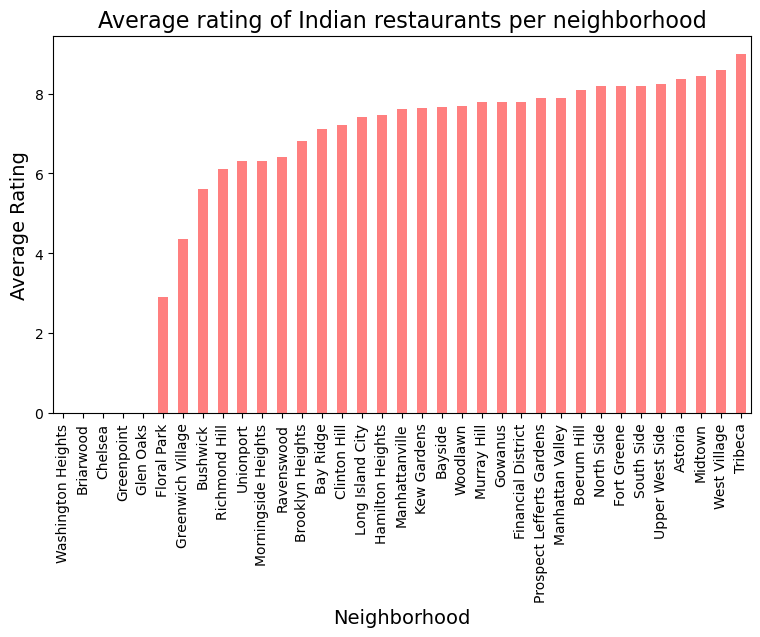

In [39]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian restaurants per neighborhood',fontsize = 16)
plt.xlabel('Borough', fontsize = 14)
plt.ylabel('Average Rating', fontsize=14)
indian_stats_ny.groupby('Neighborhood').mean()['Rating'].sort_values().plot(kind='bar', color='red', alpha=0.5)
plt.show()

### Data visualization with neighborhoods having Average Rating of 7.5 or above

In [40]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>7.5].sort_values(by='Average Rating',ascending=False)
ny_neighborhood_stats.head(20)

,Neighborhood,Average Rating
29,Tribeca,9.000000
33,West Village,8.600000
21,Midtown,8.450000
0,Astoria,8.366667
31,Upper West Side,8.233333
11,Fort Greene,8.200000
24,North Side,8.200000
28,South Side,8.200000
3,Boerum Hill,8.100000
19,Manhattan Valley,7.900000


Data visualization with geospatial info

In [41]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Tribeca,40.721522,-74.010683,9.000000
1,Manhattan,West Village,40.734434,-74.006180,8.600000
2,Manhattan,Midtown,40.754691,-73.981669,8.450000
3,Queens,Astoria,40.768509,-73.915654,8.366667
4,Manhattan,Upper West Side,40.787658,-73.977059,8.233333
5,Brooklyn,Fort Greene,40.688527,-73.972906,8.200000
6,Brooklyn,North Side,40.714823,-73.958809,8.200000
7,Brooklyn,South Side,40.710861,-73.958001,8.200000
8,Brooklyn,Boerum Hill,40.685683,-73.983748,8.100000
9,Manhattan,Manhattan Valley,40.797307,-73.964286,7.900000


### Creating the map

In [42]:
def geo_location(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [43]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)

rating = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        

ny_map.add_child(rating)

### Results & Conclusions

1. **Manhattan** has the best rated Indian restaurants.
2. Although Manhattan has the least number of neighborhoods among other boroughs, it has the greatest number of Indian restaurants.
3. The **Bronx** has the least number of Indian restaurants per borough
4. Bronx and Staten island together have only 4 Indian restaurants
5. Based on the above analysis, in order to succesfully venture into opening an Indian restaurant, it is recommended to invest in a restaurant in **Bronx**, especially on the border of Manhattan and Bronx,reason being: a) Bronx is right next to Manhattan thus easily reachable by public transport.; b) Limited presence of Indian eateries, although pretty average likes and ratings of the existing Indian joints.
6. However, it must be noted that this analysis is been  based on limited data. Hence, a comprehensive analysis should be performed to reconfirm these findings.